In [23]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [24]:
#getting the training dataset
data_train = pd.read_csv("dataset/Google_Stock_Price_Train.csv")
#displaying first 5 rows of the training dataset
print(f"The first 5 rows of Training dataset:\n\n {data_train.head(5)}\n\n")

#getting the testing dataset
data_test = pd.read_csv("dataset/Google_Stock_Price_Test.csv")

#displaying first 5 rows of the testing dataset
print(f"The first 5 rows of Testing dataset:\n\n {data_test.head(5)}\n\n")

The first 5 rows of Training dataset:

        Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


The first 5 rows of Testing dataset:

        Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400




In [25]:
# splitting train data as train and validation
length_data = len(data_train)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1258
Train data length : 881
Validation data lenth : 377


In [26]:
#train_data = data_train[:length_train].iloc[:,:2] 
train_data = data_train[:length_train]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

C:\Users\princ\AppData\Local\Temp\ipykernel_7012\4062059157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object


,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
876,2015-06-29,525.01,528.61,520.54,521.52,"1,937,800"
877,2015-06-30,526.02,526.25,520.50,520.51,"2,217,200"
878,2015-07-01,524.73,525.69,518.23,521.84,"1,961,000"
879,2015-07-02,521.08,524.65,521.08,523.4,"1,235,900"


In [27]:
#validation_data = data_train[length_train:].iloc[:,:2]

validation_data = data_train[length_train:]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

C:\Users\princ\AppData\Local\Temp\ipykernel_7012\704244391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object


,Date,Open,High,Low,Close,Volume
881,2015-07-07,523.13,526.18,515.18,525.02,"1,597,200"
882,2015-07-08,521.05,522.73,516.11,516.83,"1,296,700"
883,2015-07-09,523.12,523.77,520.35,520.68,"1,839,400"
884,2015-07-10,526.29,532.56,525.55,530.13,"1,956,700"
885,2015-07-13,532.88,547.11,532.40,546.55,"2,206,500"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"


In [28]:
#creating test set
#test_data = data_test.iloc[:,:2]
test_data = data_test
test_data['Date'] = pd.to_datetime(test_data['Date'])  # converting to date time object
test_data


,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
5,2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
6,2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
7,2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
8,2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
9,2017-01-17,807.08,807.14,800.37,804.61,"1,362,100"


In [29]:
#Creating Train Dataset from Train split
dataset_train = train_data.Close.values
dataset_train.shape
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(881, 1)

In [30]:
# Creating Test Dataset from Train split
dataset_test = test_data.Close.values
print(dataset_test.shape)
# Change 1d array to 2d array
dataset_test = np.reshape(dataset_test, (-1,1))
dataset_test.shape

(20,)


(20, 1)

In [31]:
#Creating Validation Dataset from Train split
#dataset_val = validation_data.Open.values
dataset_val = validation_data.Close.values
dataset_val.shape
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_val = np.reshape(dataset_val, (-1,1))
dataset_val.shape

(377, 1)

In [32]:
def preprocess_column(column):
    if column.dtype == 'object':
        return column.astype(str).str.replace(',', '').astype(float)
    return column
# Ensure preprocessing is applied to the original pandas DataFrame
data_train['Close'] = preprocess_column(data_train['Close'])
data_test['Close'] = preprocess_column(data_test['Close'])
validation_data['Close'] = preprocess_column(validation_data['Close'])

# Then extract numpy arrays
dataset_train = data_train['Close'].values.reshape(-1, 1)
dataset_test = data_test['Close'].values.reshape(-1, 1)
dataset_val = validation_data['Close'].values.reshape(-1, 1)


C:\Users\princ\AppData\Local\Temp\ipykernel_7012\252055259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Close'] = preprocess_column(validation_data['Close'])


In [33]:
#Normalization / Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_val_scaled = scaler.fit_transform(dataset_val)
dataset_test_scaled = scaler.fit_transform(dataset_test)


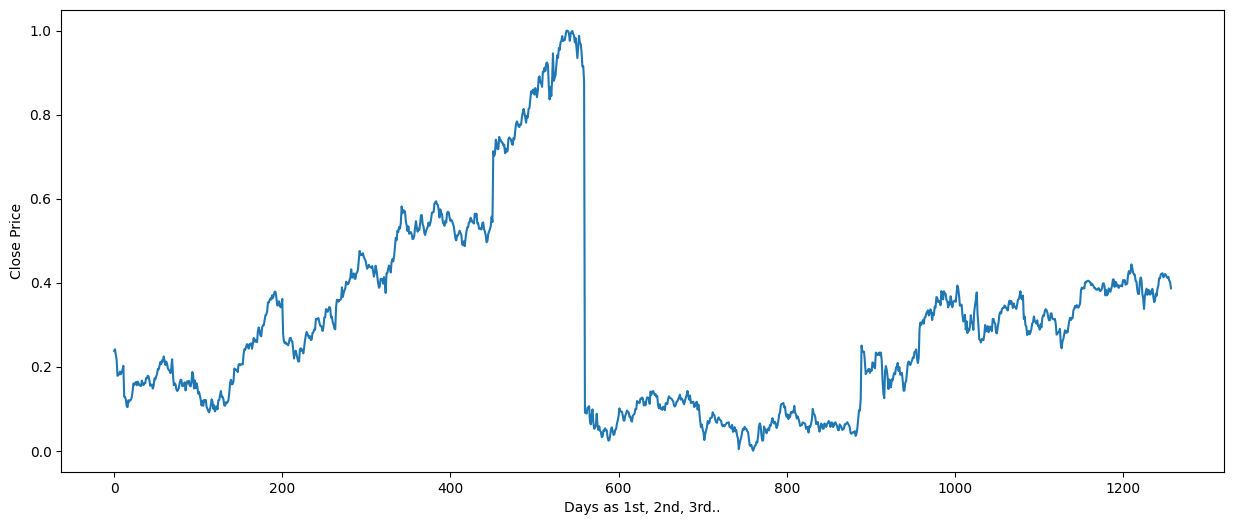

In [34]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
#plt.ylabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [35]:
# Creating X_train and y_train from Train data
X_train = []
y_train = []

time_step = 2

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train before reshape : (879, 2)
Shape of y_train before reshape : (879,)
Shape of X_train after reshape : (879, 2, 1)
Shape of y_train after reshape : (879, 1)


In [36]:
# Creating X_val and y_val from val data
X_val = []
y_val = []

time_step = 2

for i in range(time_step, length_validation):
    X_val.append(dataset_val_scaled[i-time_step:i,0])
    y_val.append(dataset_val_scaled[i,0])
    
# convert list to array
X_val, y_val = np.array(X_val), np.array(y_val)

print("Shape of X_val before reshape :",X_val.shape)
print("Shape of y_val before reshape :",y_val.shape)

#Reshaping
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val = np.reshape(y_val, (y_val.shape[0],1))

print("Shape of X_val after reshape :",X_val.shape)
print("Shape of y_val after reshape :",y_val.shape)

Shape of X_val before reshape : (375, 2)
Shape of y_val before reshape : (375,)
Shape of X_val after reshape : (375, 2, 1)
Shape of y_val after reshape : (375, 1)


In [37]:
# Creating X_test and y_test from test data
X_test = []
y_test = []

time_step = 2
length_test = len(data_test)
for i in range(time_step, length_test):
    X_test.append(dataset_test_scaled[i-time_step:i,0])
    y_test.append(dataset_test_scaled[i,0])
    
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test before reshape : (18, 2)
Shape of y_test before reshape : (18,)
Shape of X_test after reshape : (18, 2, 1)
Shape of y_test after reshape : (18, 1)


In [38]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Define a function to create and train an RNN model
def train_rnn_model(X_train, y_train, rnn_units=[128, 64, 32], dropout_rate=0.2, epochs=100, batch_size=10):
    """
    Create and train an RNN model with multiple layers.
    
    Parameters:
    X_train (numpy array): Training input data
    y_train (numpy array): Training target data
    rnn_units (list): List of integers specifying the number of units for each RNN layer
    dropout_rate (float): Dropout rate for the dropout layer
    epochs (int): Number of epochs to train the model
    batch_size (int): Batch size for training
    
    Returns:
    model_rnn (keras Model): The trained RNN model
    history_rnn (History): The training history object
    """
    model_rnn = Sequential()
    
    # Add the first RNN layer with return_sequences=True
    model_rnn.add(SimpleRNN(rnn_units[0], return_sequences=True, input_shape=(X_train.shape[1], 1)))
    
    # Add the remaining RNN layers
    for units in rnn_units[1:]:
        model_rnn.add(SimpleRNN(units, return_sequences=True))

    # Add the last RNN layer with return_sequences=False
    model_rnn.add(SimpleRNN(rnn_units[-1], return_sequences=False))
    
    # Add a Dropout layer to prevent overfitting
    model_rnn.add(Dropout(dropout_rate))
    
    # Add a Dense output layer with 1 neuron (for regression output)
    model_rnn.add(Dense(1))
    
    # Compile the model using Adam optimizer and Mean Squared Error loss
    model_rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    # Train the model on the training data
    history_rnn = model_rnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    return model_rnn, history_rnn


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model_performance(y_true, y_pred):
    """
    This function evaluates the model's performance using different metrics:
    Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
    It also calculates the percentage of predictions within a tolerance.

    Parameters:
    y_true: Actual values (true data)
    y_pred: Predicted values from the model
    """
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    
    # Define tolerance level (e.g., within 5%)
    tolerance = 0.01

    # Calculate the percentage difference between actual and predicted values
    percentage_difference = np.abs((y_pred - y_true) / y_true)

    # Check if predictions are within the tolerance
    within_tolerance = percentage_difference < tolerance

    # Calculate accuracy as a percentage of predictions within the tolerance
    accuracy = np.mean(within_tolerance) * 100
    print(f"Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")


In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def evaluate_predictions(model, X_data, y_data, scaler, data_type="Train"):
    """
    This function evaluates the model predictions on either the training or validation data.

    Parameters:
    model: Trained model to predict data
    X_data: Input features (X_train or X_val)
    y_data: Actual values (y_train or y_val)
    scaler: The scaler used for inverse transformation
    data_type: String indicating whether it's "Train" or "Validation" data (default is "Train")
    """
    # Predicting the data
    predictions = model.predict(X_data)
    
    # Inverse transform the predicted and actual values
    predictions = scaler.inverse_transform(predictions)
    y_data = scaler.inverse_transform(y_data)  # Ensure actual values are also inverse transformed
    
    # Print the first 10 actual vs predicted values for debugging
    for actual, predicted in zip(y_data[:10], predictions[:10]):
        print(f"Actual: {actual}, Predicted: {predicted}")
    
    # Plotting the predictions vs actual values
    plt.subplots(figsize=(30, 12))
    plt.plot(predictions, label=f"y_pred_of_{data_type.lower()}", color="orange")
    plt.plot(y_data, label=f"y_{data_type.lower()}", color="g")
    plt.xlabel("Days")
    plt.ylabel("Open price")
    plt.title(f"LSTM model, Predictions with input X_{data_type.lower()} vs y_{data_type.lower()}")
    plt.legend()
    plt.show()
    
    # Evaluate the model performance
    evaluate_model_performance(y_data, predictions)


In [41]:
model_rnn, history_rnn = train_rnn_model(X_train, y_train, rnn_units=[128, 64, 32], dropout_rate=0.2, epochs=50, batch_size=32)

Epoch 1/50


c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0029 - loss: 0.1379 
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0026 - loss: 0.0066 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 9.0052e-04 - loss: 0.0045
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0013 - loss: 0.0027  
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 9.9083e-04 - loss: 0.0040
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0019 - loss: 0.0031  
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 3.1963e-04 - loss: 0.0045
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0020 - loss: 0.0073 
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0018 - loss: 0.0056  
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0016 - loss: 0.0031  
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0040 - loss: 0.0027 
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

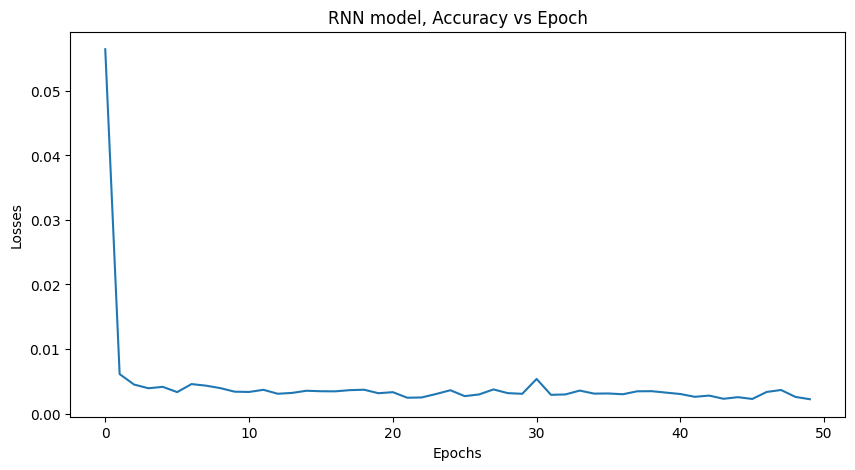

In [42]:
plt.figure(figsize =(10,5))
plt.plot(history_rnn.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN model, Accuracy vs Epoch")
plt.show()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Actual: [797.47149856], Predicted: [798.17755]
Actual: [796.85922495], Predicted: [797.7995]
Actual: [794.9834971], Predicted: [797.12805]
Actual: [795.02922991], Predicted: [795.5594]
Actual: [795.22171727], Predicted: [794.8956]
Actual: [795.47222386], Predicted: [795.05035]
Actual: [795.15550708], Predicted: [795.301]
Actual: [795.39987046], Predicted: [795.1675]
Actual: [795.6947447], Predicted: [795.2247]
Actual: [796.14797734], Predicted: [795.5264]


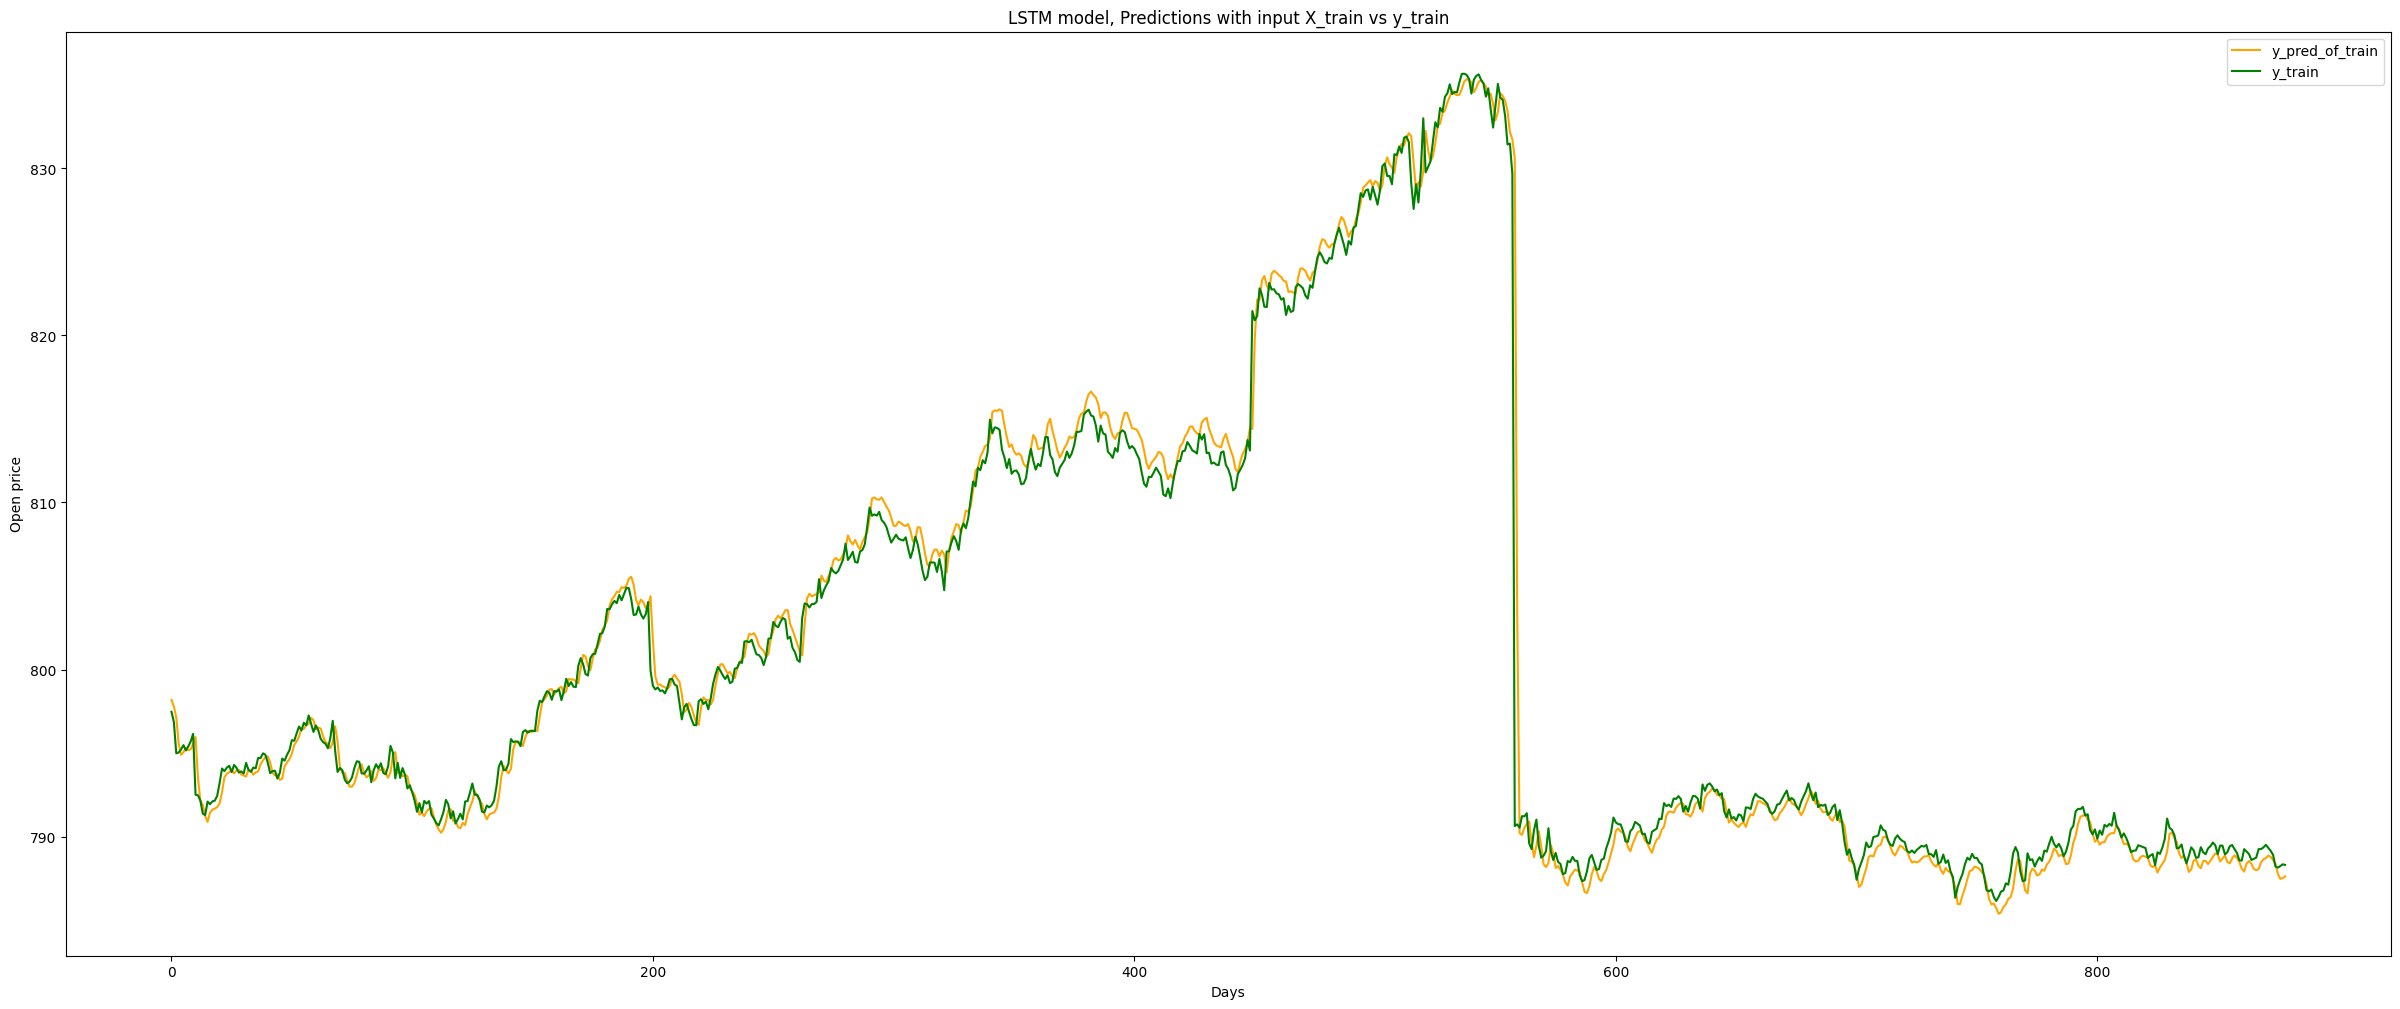

Mean Squared Error (MSE): 2.858380566373911
Mean Absolute Error (MAE): 0.7693433731810704
Root Mean Squared Error (RMSE): 1.6906745891430175
Accuracy (within 1.0% tolerance): 99.77%


In [43]:
evaluate_predictions(model_rnn, X_train, y_train, scaler, data_type="Train")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Actual: [786.78361584], Predicted: [785.78784]
Actual: [788.36340016], Predicted: [785.74603]
Actual: [791.10837991], Predicted: [787.1046]
Actual: [793.54074625], Predicted: [789.64154]
Actual: [793.39363406], Predicted: [792.39307]
Actual: [796.67523896], Predicted: [793.18964]
Actual: [812.23569664], Predicted: [795.48193]
Actual: [810.57901276], Predicted: [807.6645]
Actual: [810.45864824], Predicted: [812.1427]
Actual: [810.42521365], Predicted: [811.48376]


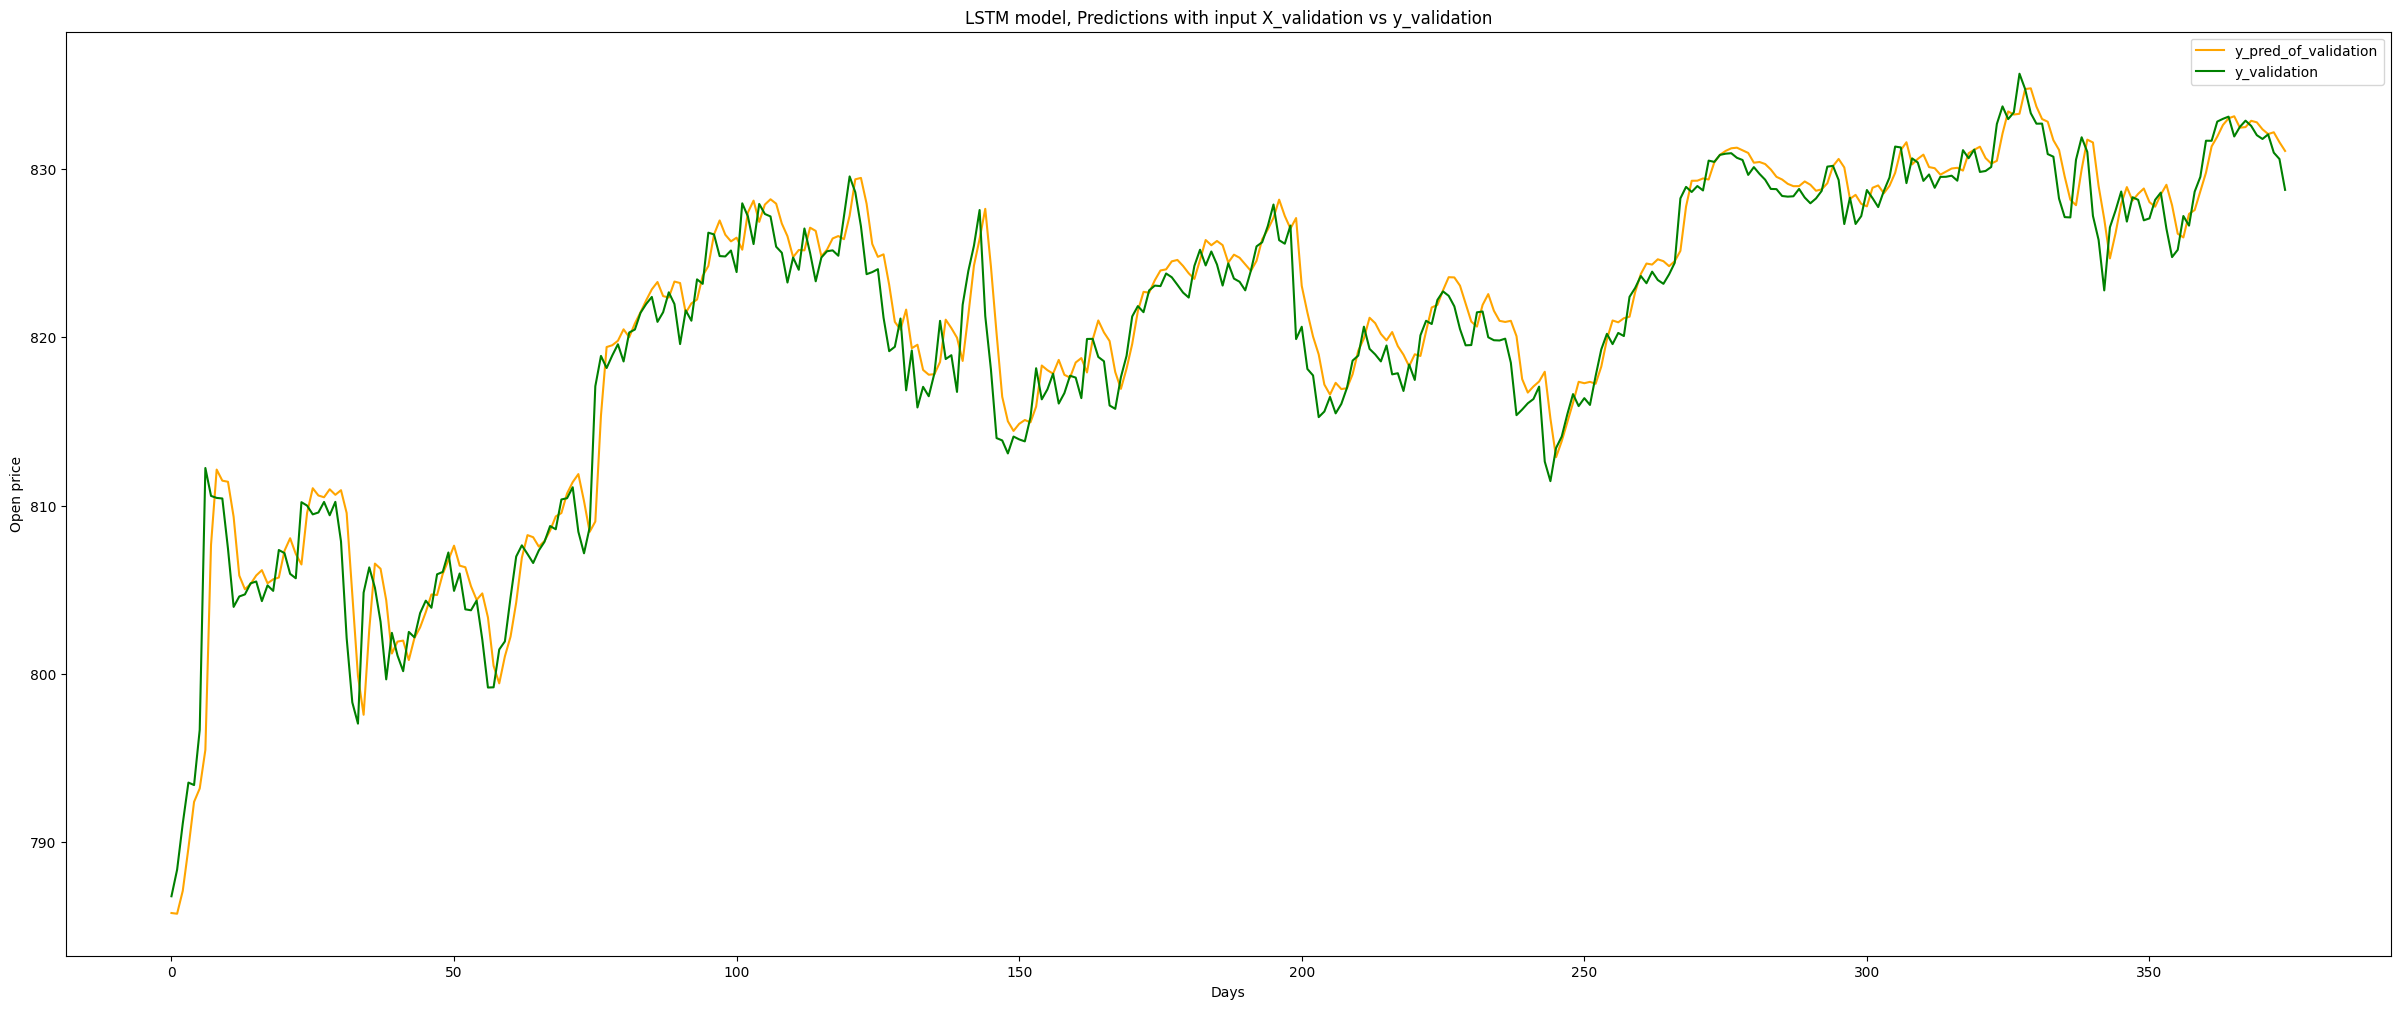

Mean Squared Error (MSE): 4.6651281657275785
Mean Absolute Error (MAE): 1.4765620083857671
Root Mean Squared Error (RMSE): 2.1598907763420767
Accuracy (within 1.0% tolerance): 99.73%


In [44]:
evaluate_predictions(model_rnn, X_val, y_val, scaler, data_type="Validation")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Actual: [794.02], Predicted: [785.82874]
Actual: [806.15], Predicted: [791.1833]
Actual: [806.65], Predicted: [802.43933]
Actual: [804.79], Predicted: [807.25665]
Actual: [807.91], Predicted: [806.1286]
Actual: [806.36], Predicted: [807.64777]
Actual: [807.88], Predicted: [807.68396]
Actual: [804.61], Predicted: [808.1935]
Actual: [806.07], Predicted: [806.44244]
Actual: [802.17], Predicted: [806.2927]


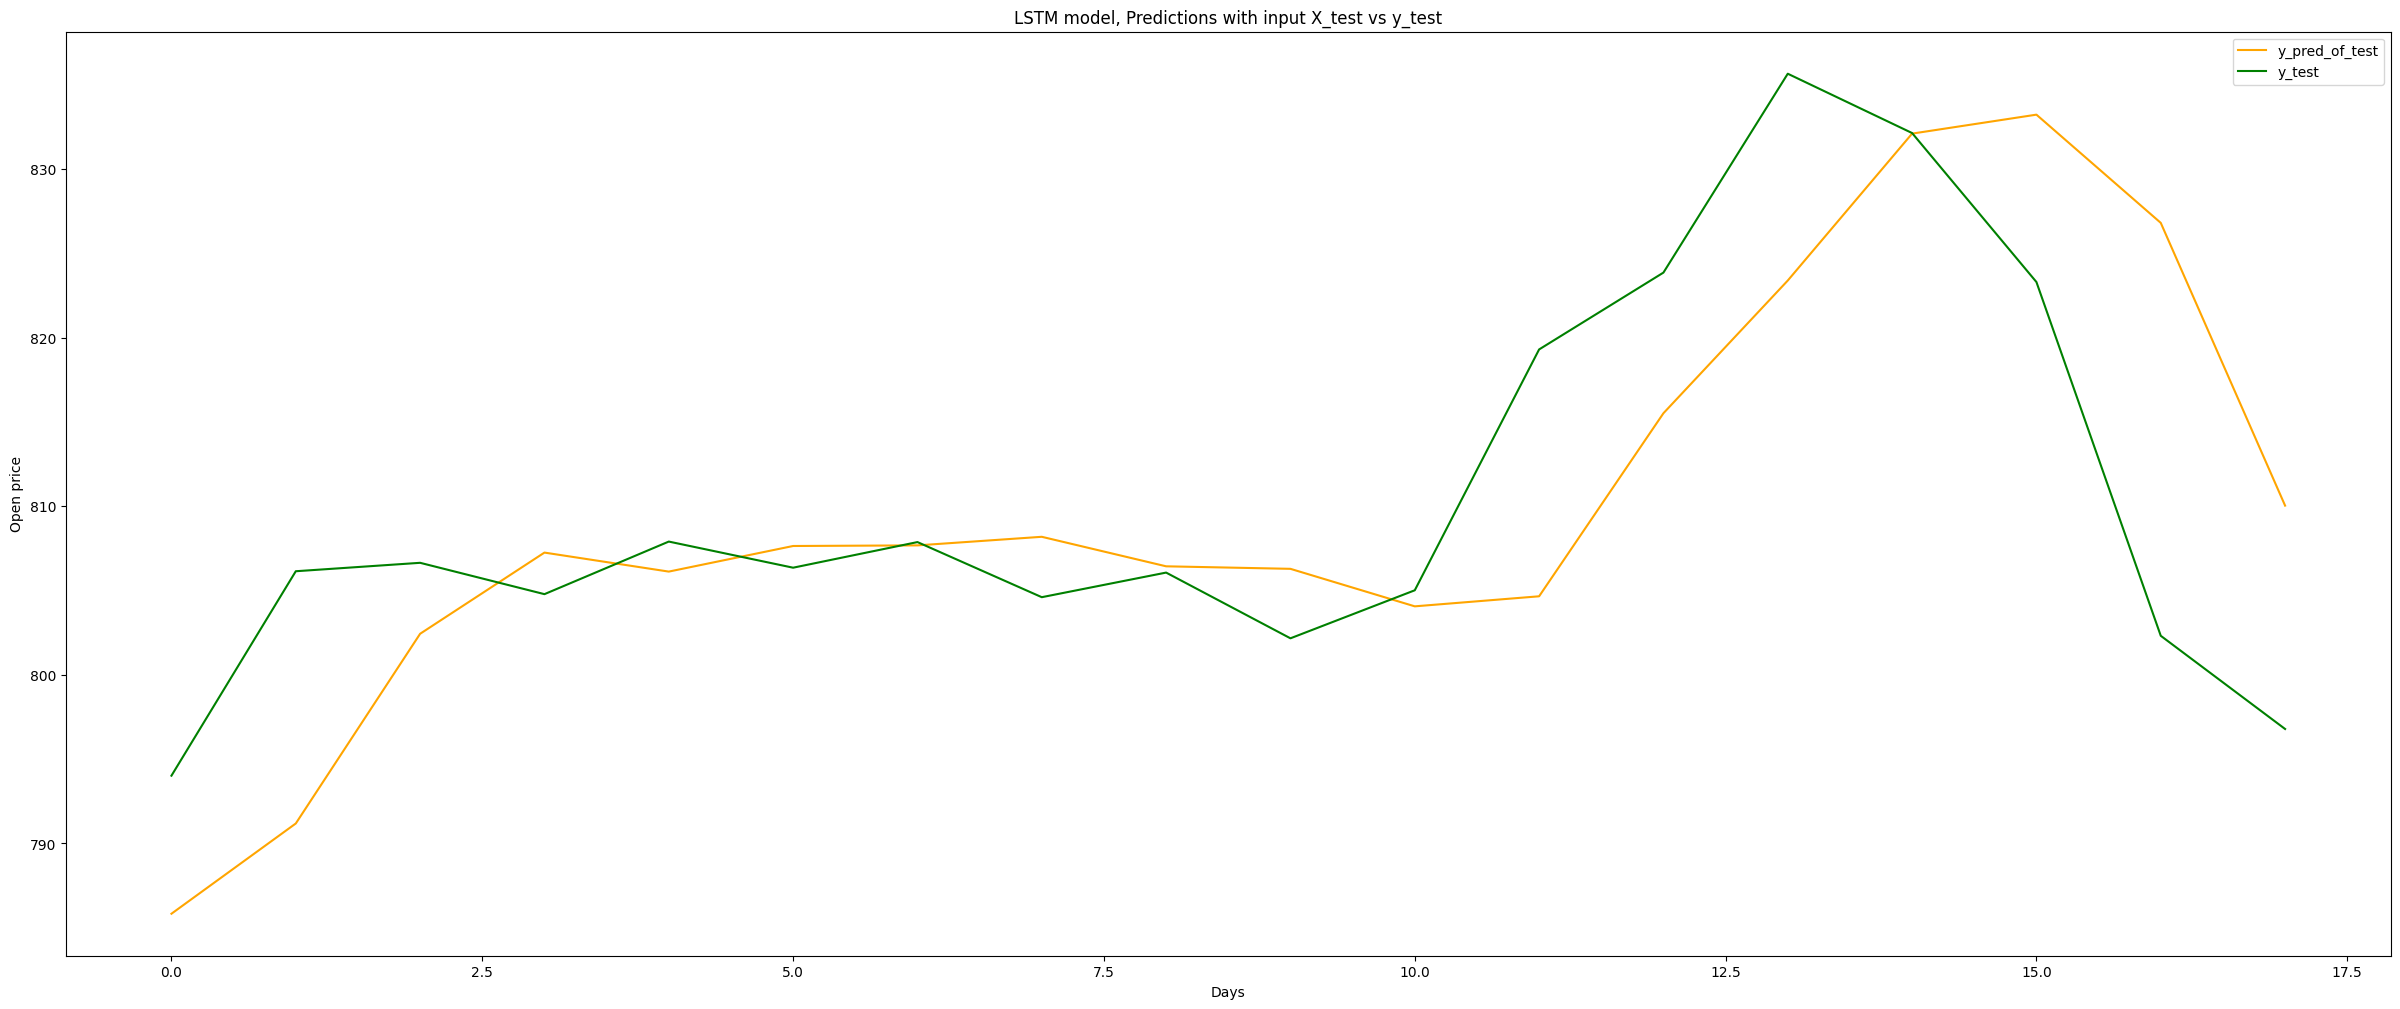

Mean Squared Error (MSE): 92.21966358251346
Mean Absolute Error (MAE): 6.950709499782976
Root Mean Squared Error (RMSE): 9.603106975480044
Accuracy (within 1.0% tolerance): 55.56%


In [45]:
evaluate_predictions(model_rnn, X_test, y_test, scaler, data_type="Test")

Epoch 1/50


c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0047 - loss: 0.0142 
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0029 - loss: 0.0056 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0031 - loss: 0.0032 
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0016 - loss: 0.0040 
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0085 - loss: 0.0027
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0014 - loss: 0.0024  
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0022 - loss: 0.0031 
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0037 - loss: 0.0033 
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0010 - loss: 0.0036     
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 9.6334e-04 - loss: 0.0020
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0021 - loss: 0.0033 
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.00

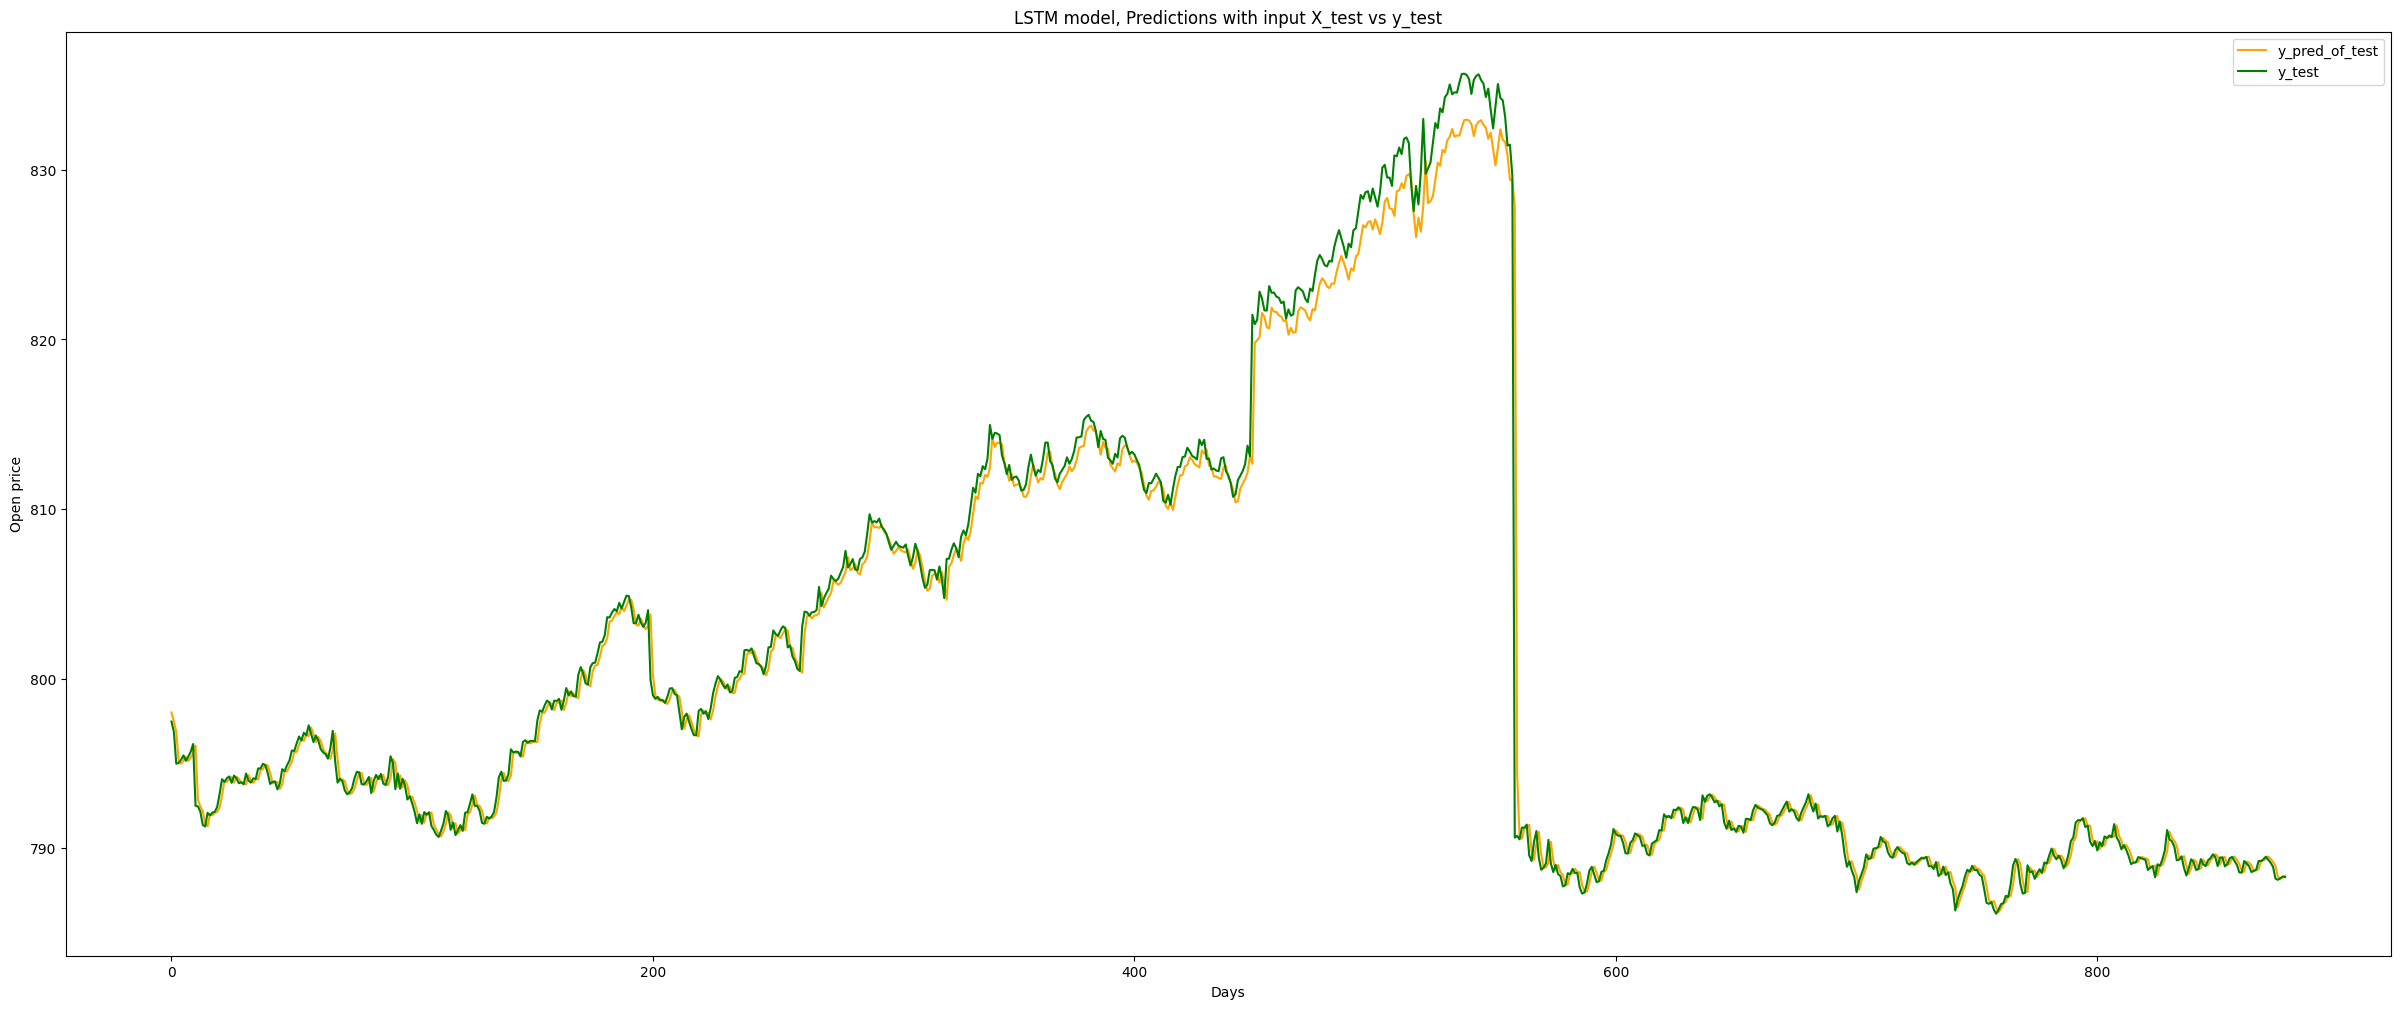

Mean Squared Error (MSE): 2.565453632402169
Mean Absolute Error (MAE): 0.6866749591015787
Root Mean Squared Error (RMSE): 1.6017033534341398
Accuracy (within 1.0% tolerance): 99.77%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Actual: [786.78361584], Predicted: [786.35425]
Actual: [788.36340016], Predicted: [786.79254]
Actual: [791.10837991], Predicted: [788.2569]
Actual: [793.54074625], Predicted: [790.8494]
Actual: [793.39363406], Predicted: [793.2818]
Actual: [796.67523896], Predicted: [793.39154]
Actual: [812.23569664], Predicted: [796.2934]
Actual: [810.57901276], Predicted: [810.30005]
Actual: [810.45864824], Predicted: [810.33795]
Actual: [810.42521365], Predicted: [810.0908]


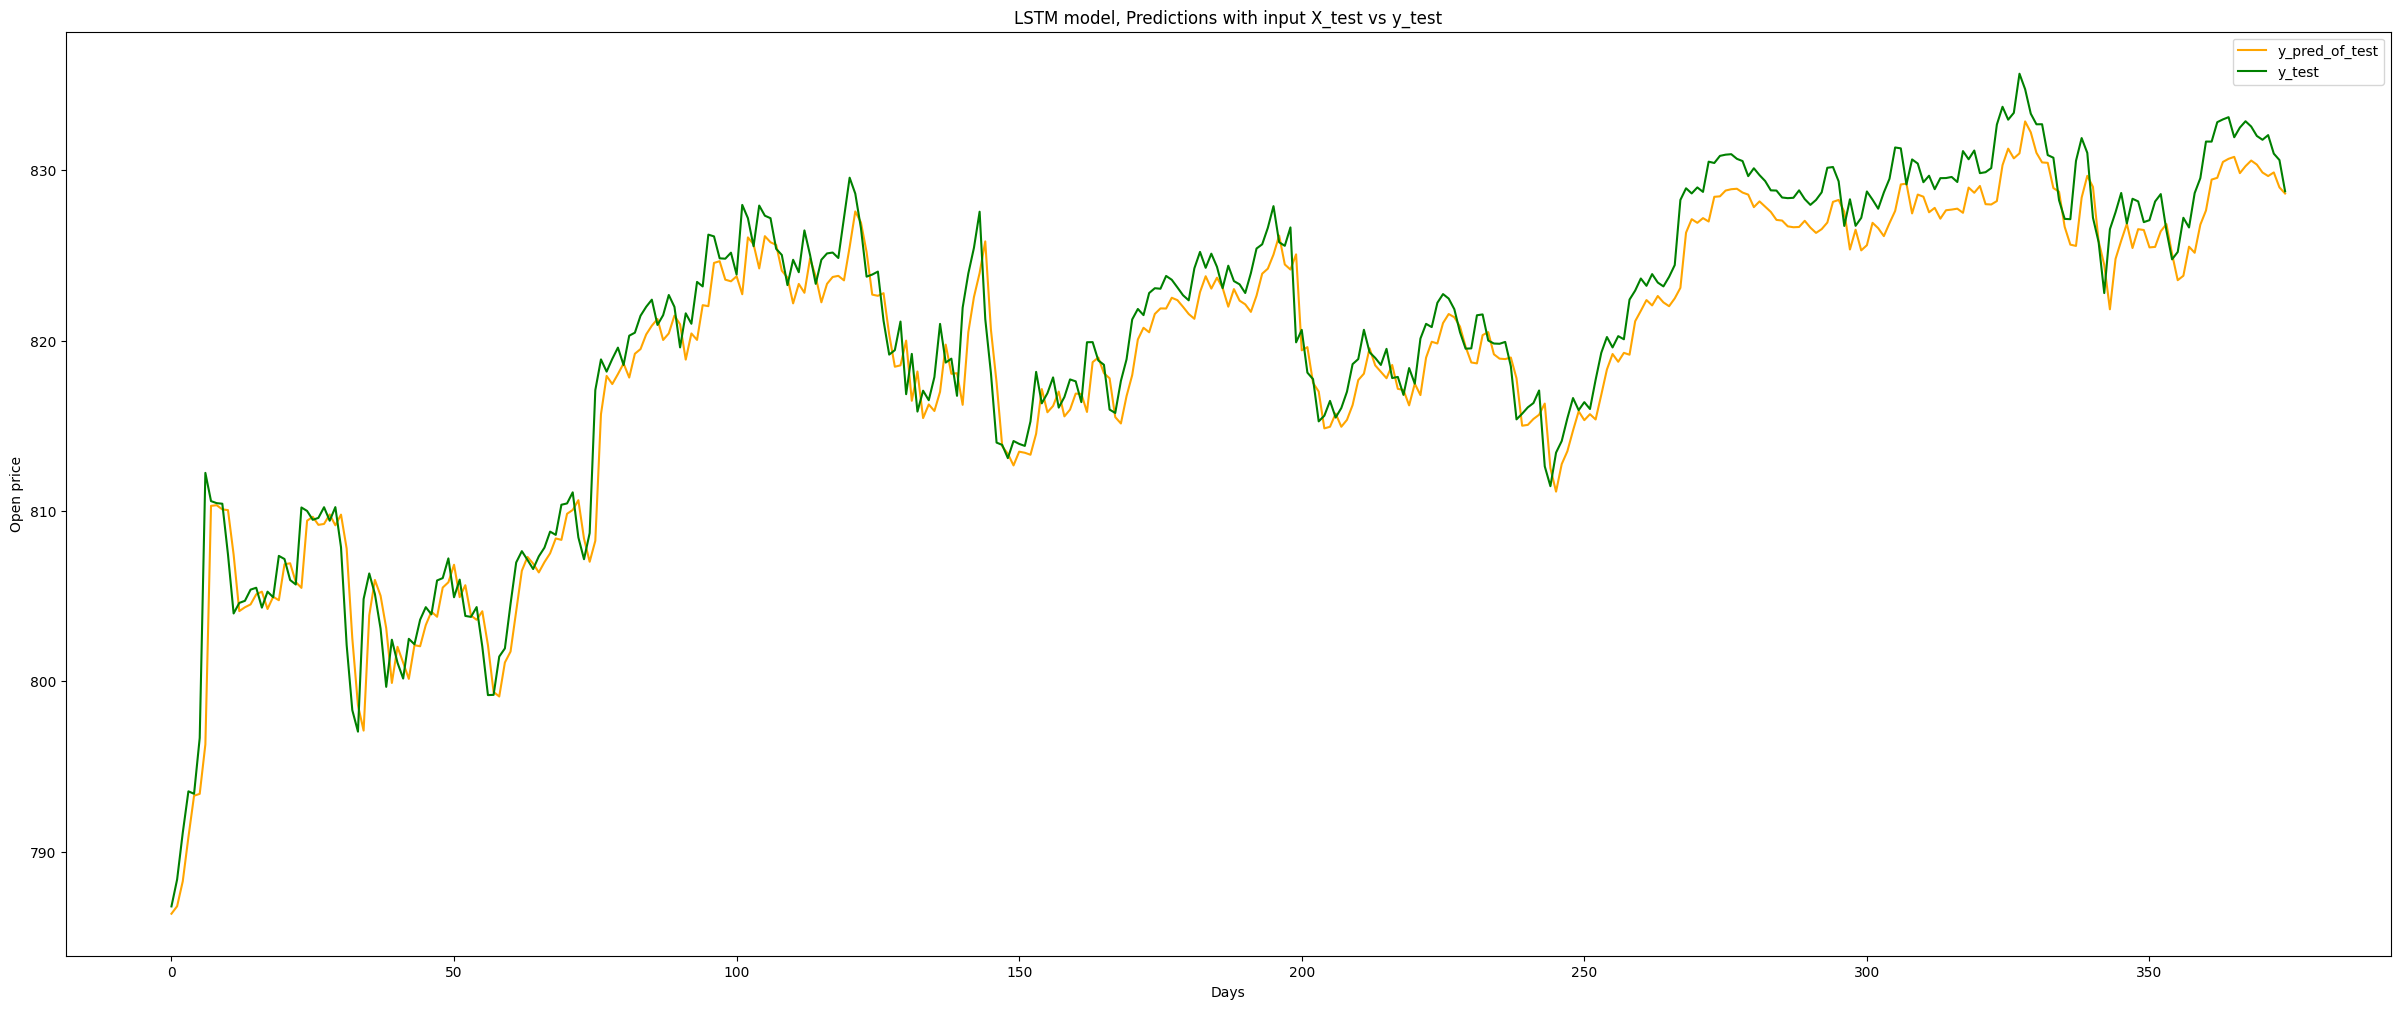

Mean Squared Error (MSE): 5.126138798689781
Mean Absolute Error (MAE): 1.7428214219630525
Root Mean Squared Error (RMSE): 2.264097789118169
Accuracy (within 1.0% tolerance): 99.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Actual: [794.02], Predicted: [786.89575]
Actual: [806.15], Predicted: [793.2912]
Actual: [806.65], Predicted: [804.72455]
Actual: [804.79], Predicted: [806.354]
Actual: [807.91], Predicted: [804.7614]
Actual: [806.36], Predicted: [807.3346]
Actual: [807.88], Predicted: [806.25934]
Actual: [804.61], Predicted: [807.4543]
Actual: [806.07], Predicted: [804.71454]
Actual: [802.17], Predicted: [805.7004]


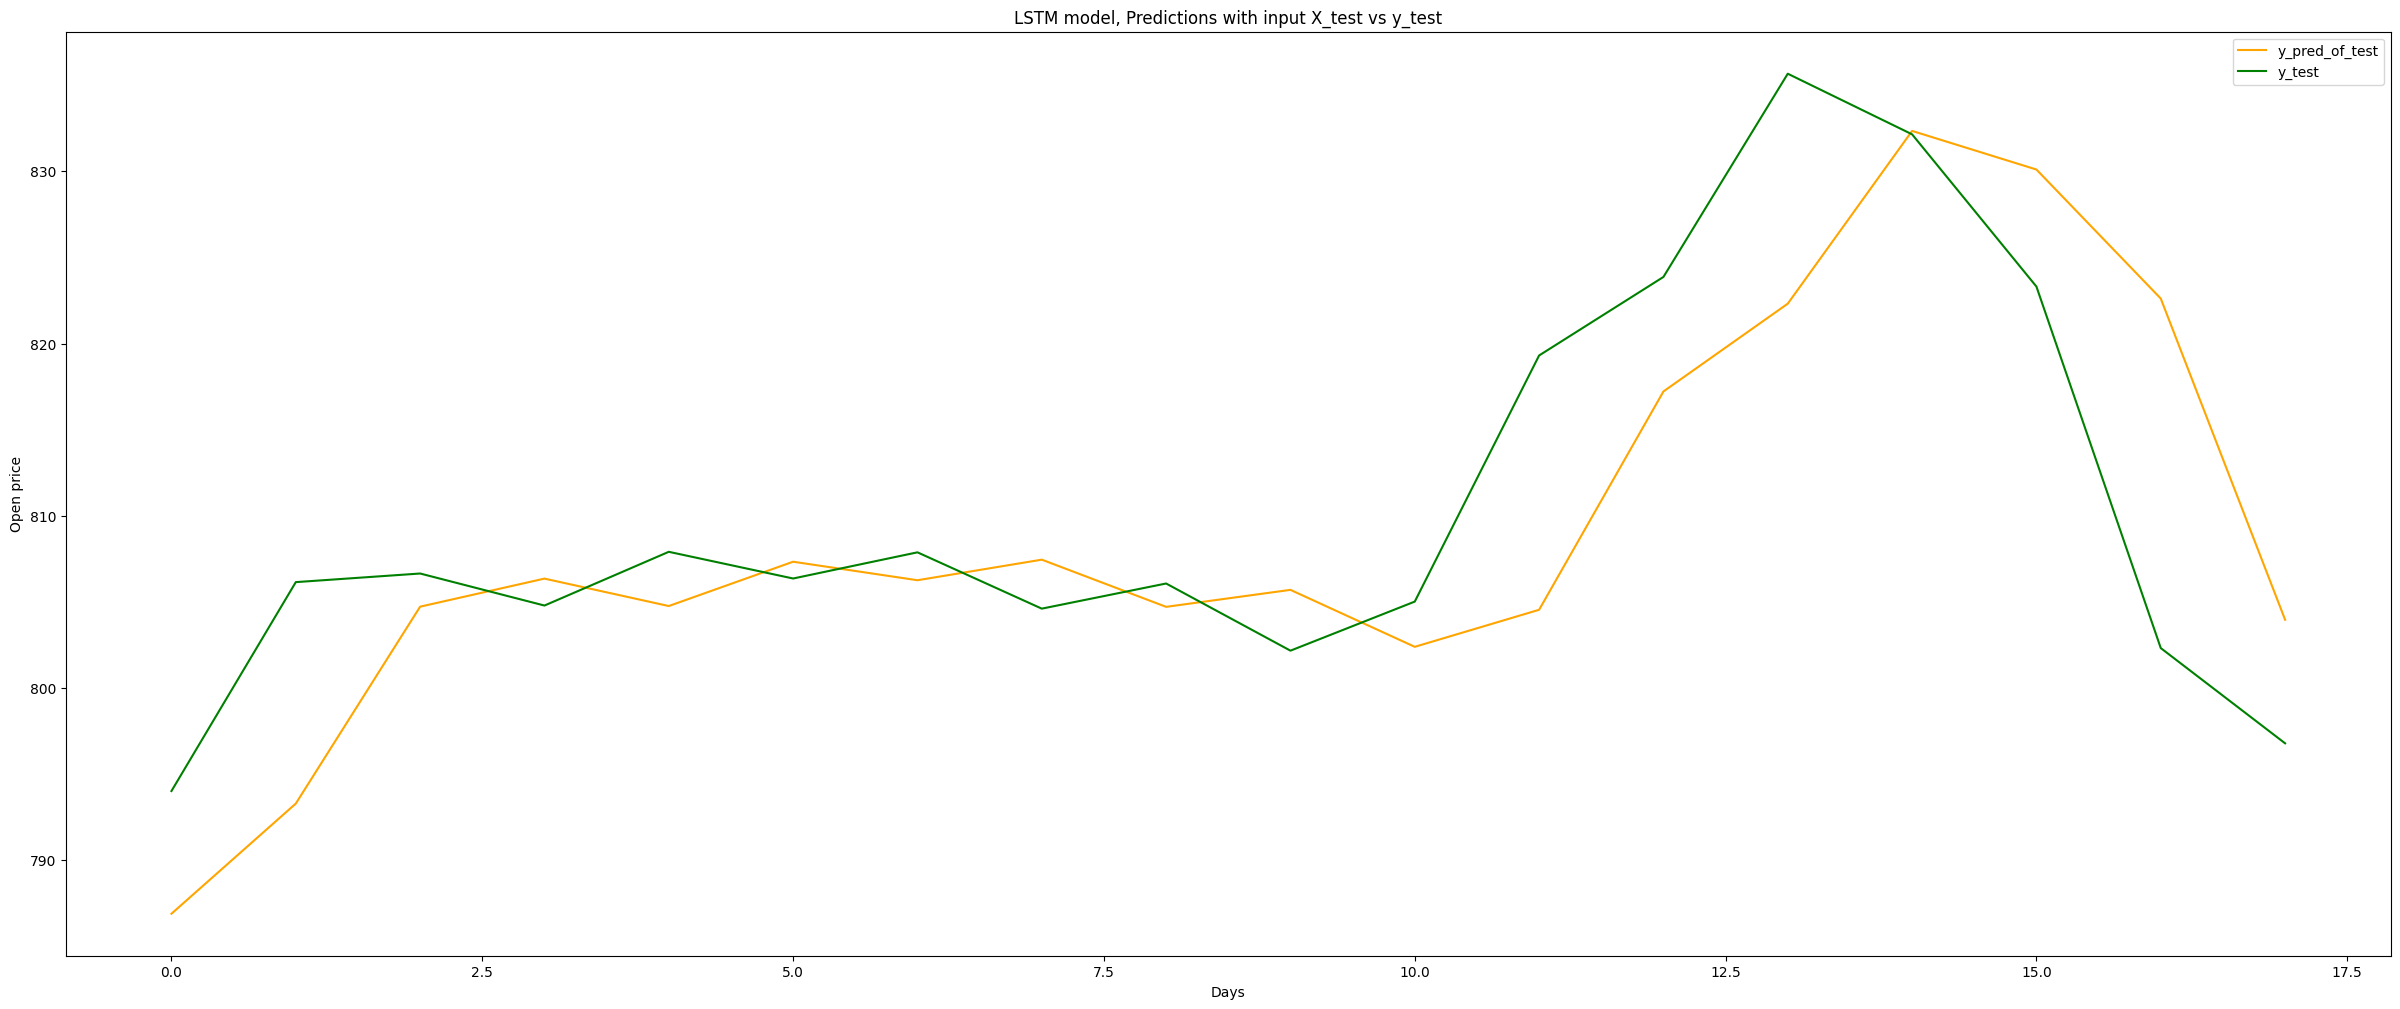

Mean Squared Error (MSE): 67.51089292742608
Mean Absolute Error (MAE): 6.044912380642359
Root Mean Squared Error (RMSE): 8.216501258286648
Accuracy (within 1.0% tolerance): 77.78%


In [46]:
# with 2 layers 64 and 32 units
model_rnn, history_rnn = train_rnn_model(X_train, y_train, rnn_units=[64, 32], dropout_rate=0.2, epochs=50, batch_size=32)
evaluate_predictions(model_rnn, X_train, y_train, scaler, data_type="Test")

evaluate_predictions(model_rnn, X_val, y_val, scaler, data_type="Test")

evaluate_predictions(model_rnn, X_test, y_test, scaler, data_type="Test")


Epoch 1/50


c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0019 - loss: 0.0470
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0045 - loss: 0.0055
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0035 - loss: 0.0046
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0029 - loss: 0.0048
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 9.8353e-04 - loss: 0.0040
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 4.8398e-04 - loss: 0.0045
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0016 - loss: 0.0054
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0021 - loss: 0.0037
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0026 - loss: 0.0024
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0018 - loss: 0.0031
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0015 - loss: 0.0035
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 4.9184e-04 - l

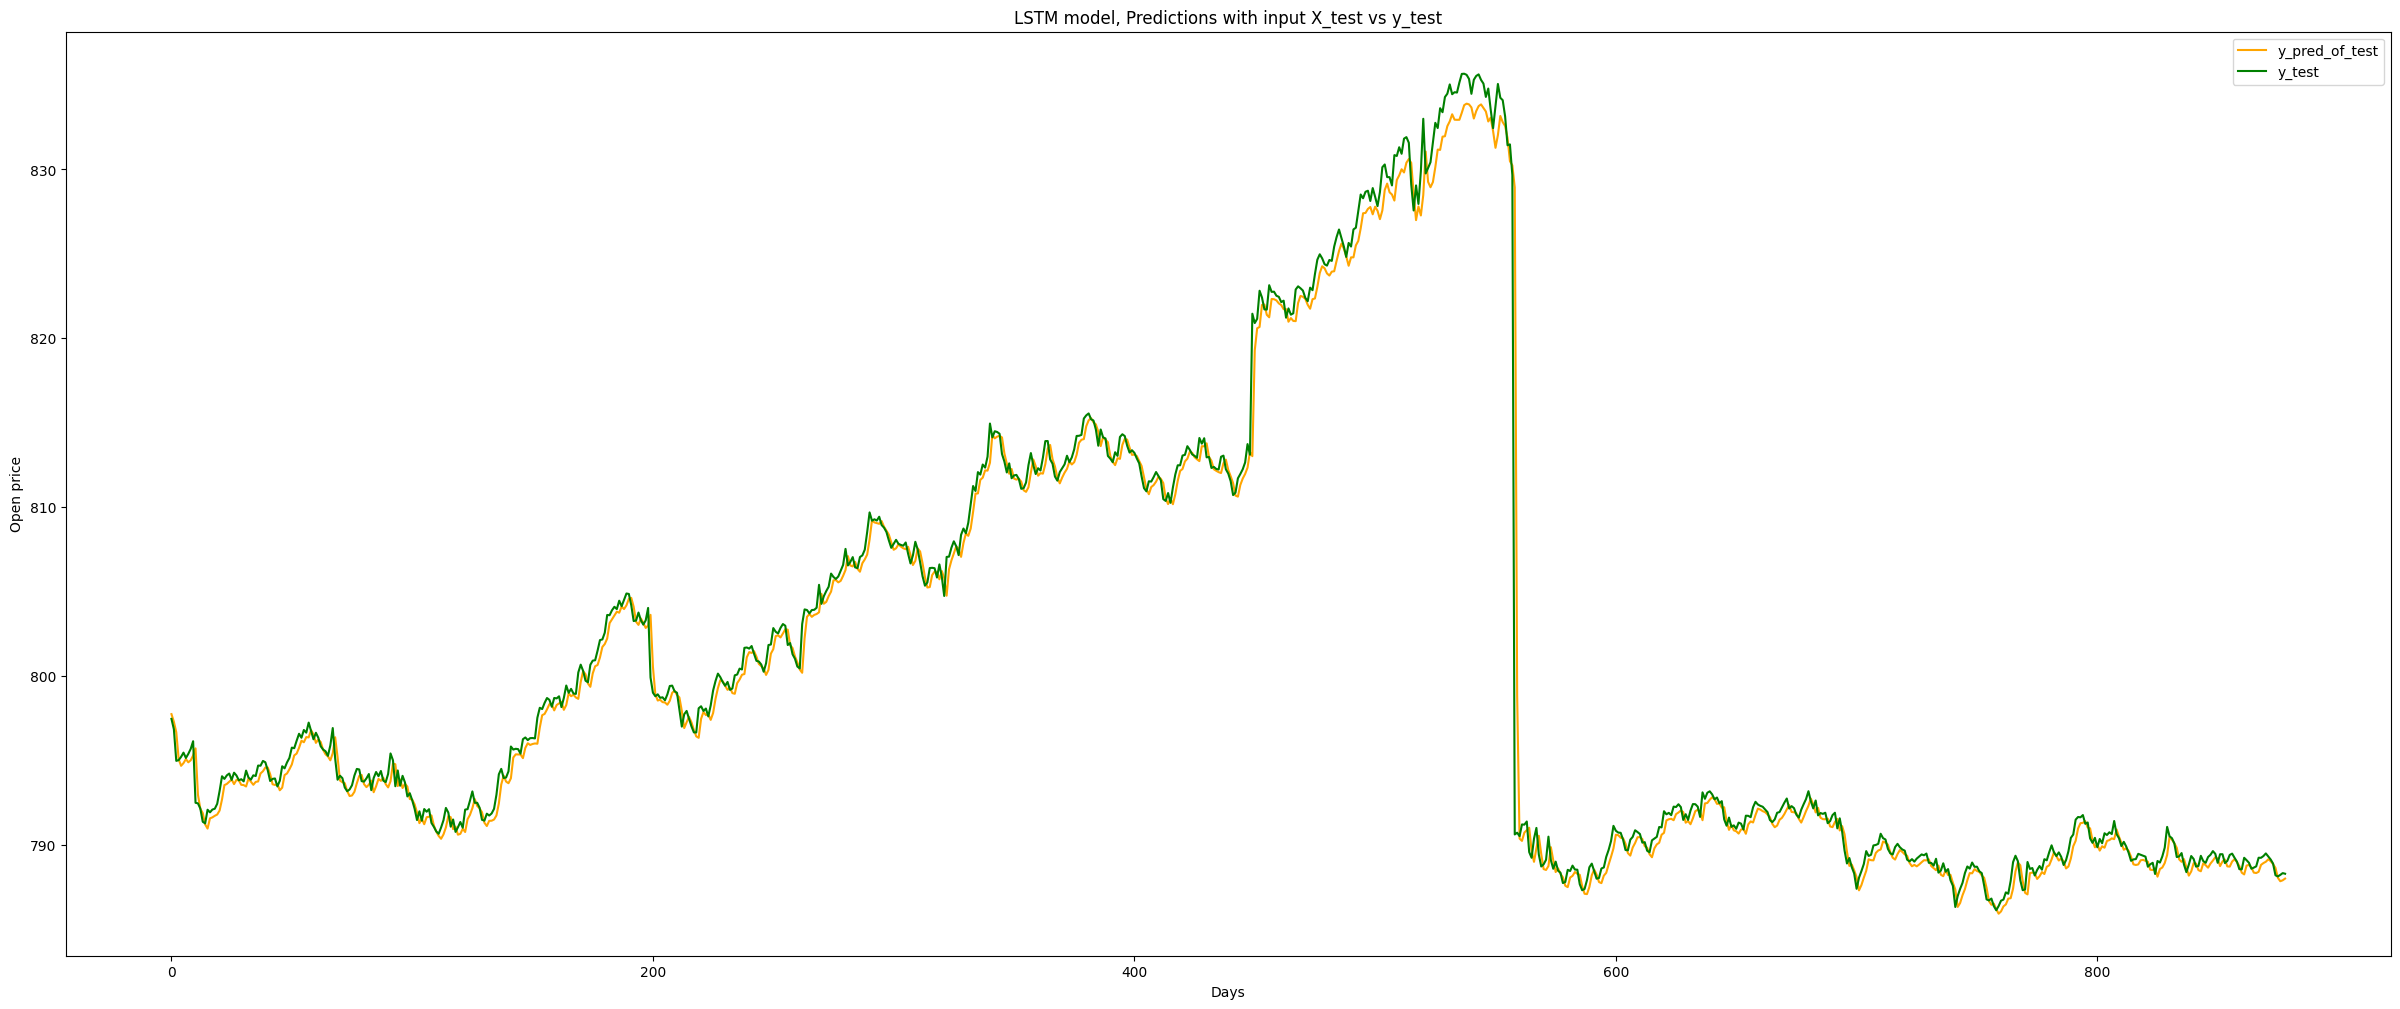

Mean Squared Error (MSE): 2.476307570007901
Mean Absolute Error (MAE): 0.6614396976697897
Root Mean Squared Error (RMSE): 1.5736287904102102
Accuracy (within 1.0% tolerance): 99.66%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Actual: [786.78361584], Predicted: [786.1729]
Actual: [788.36340016], Predicted: [786.37317]
Actual: [791.10837991], Predicted: [787.7224]
Actual: [793.54074625], Predicted: [790.1812]
Actual: [793.39363406], Predicted: [792.6701]
Actual: [796.67523896], Predicted: [793.0932]
Actual: [812.23569664], Predicted: [795.6237]
Actual: [810.57901276], Predicted: [808.5398]
Actual: [810.45864824], Predicted: [810.73]
Actual: [810.42521365], Predicted: [810.2759]


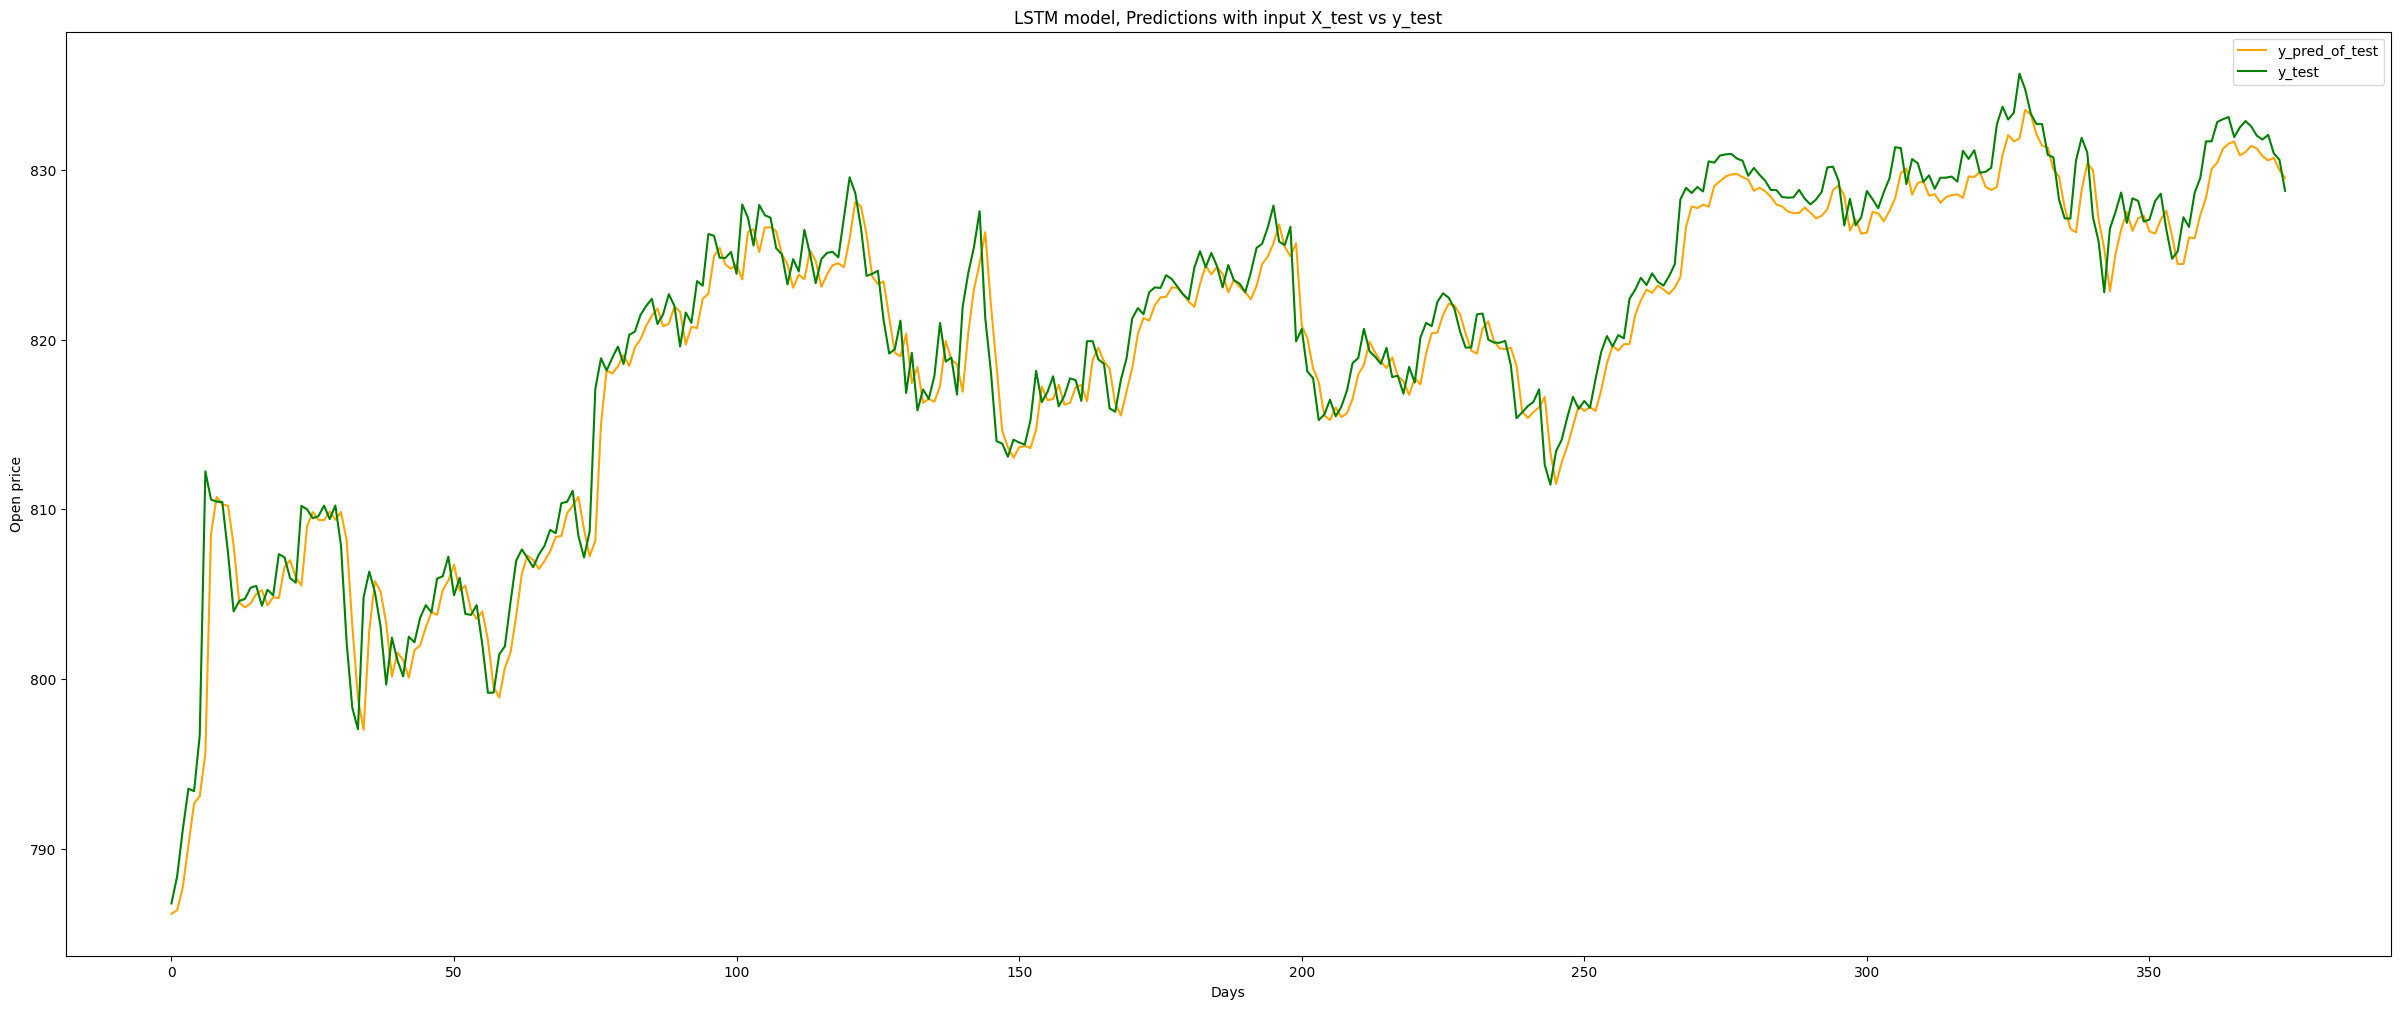

Mean Squared Error (MSE): 4.269247462905188
Mean Absolute Error (MAE): 1.469987016625942
Root Mean Squared Error (RMSE): 2.0662157348411583
Accuracy (within 1.0% tolerance): 99.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Actual: [794.02], Predicted: [786.4622]
Actual: [806.15], Predicted: [792.1252]
Actual: [806.65], Predicted: [803.1918]
Actual: [804.79], Predicted: [806.31726]
Actual: [807.91], Predicted: [804.9687]
Actual: [806.36], Predicted: [807.00104]
Actual: [807.88], Predicted: [806.4811]
Actual: [804.61], Predicted: [807.3283]
Actual: [806.07], Predicted: [805.10065]
Actual: [802.17], Predicted: [805.518]


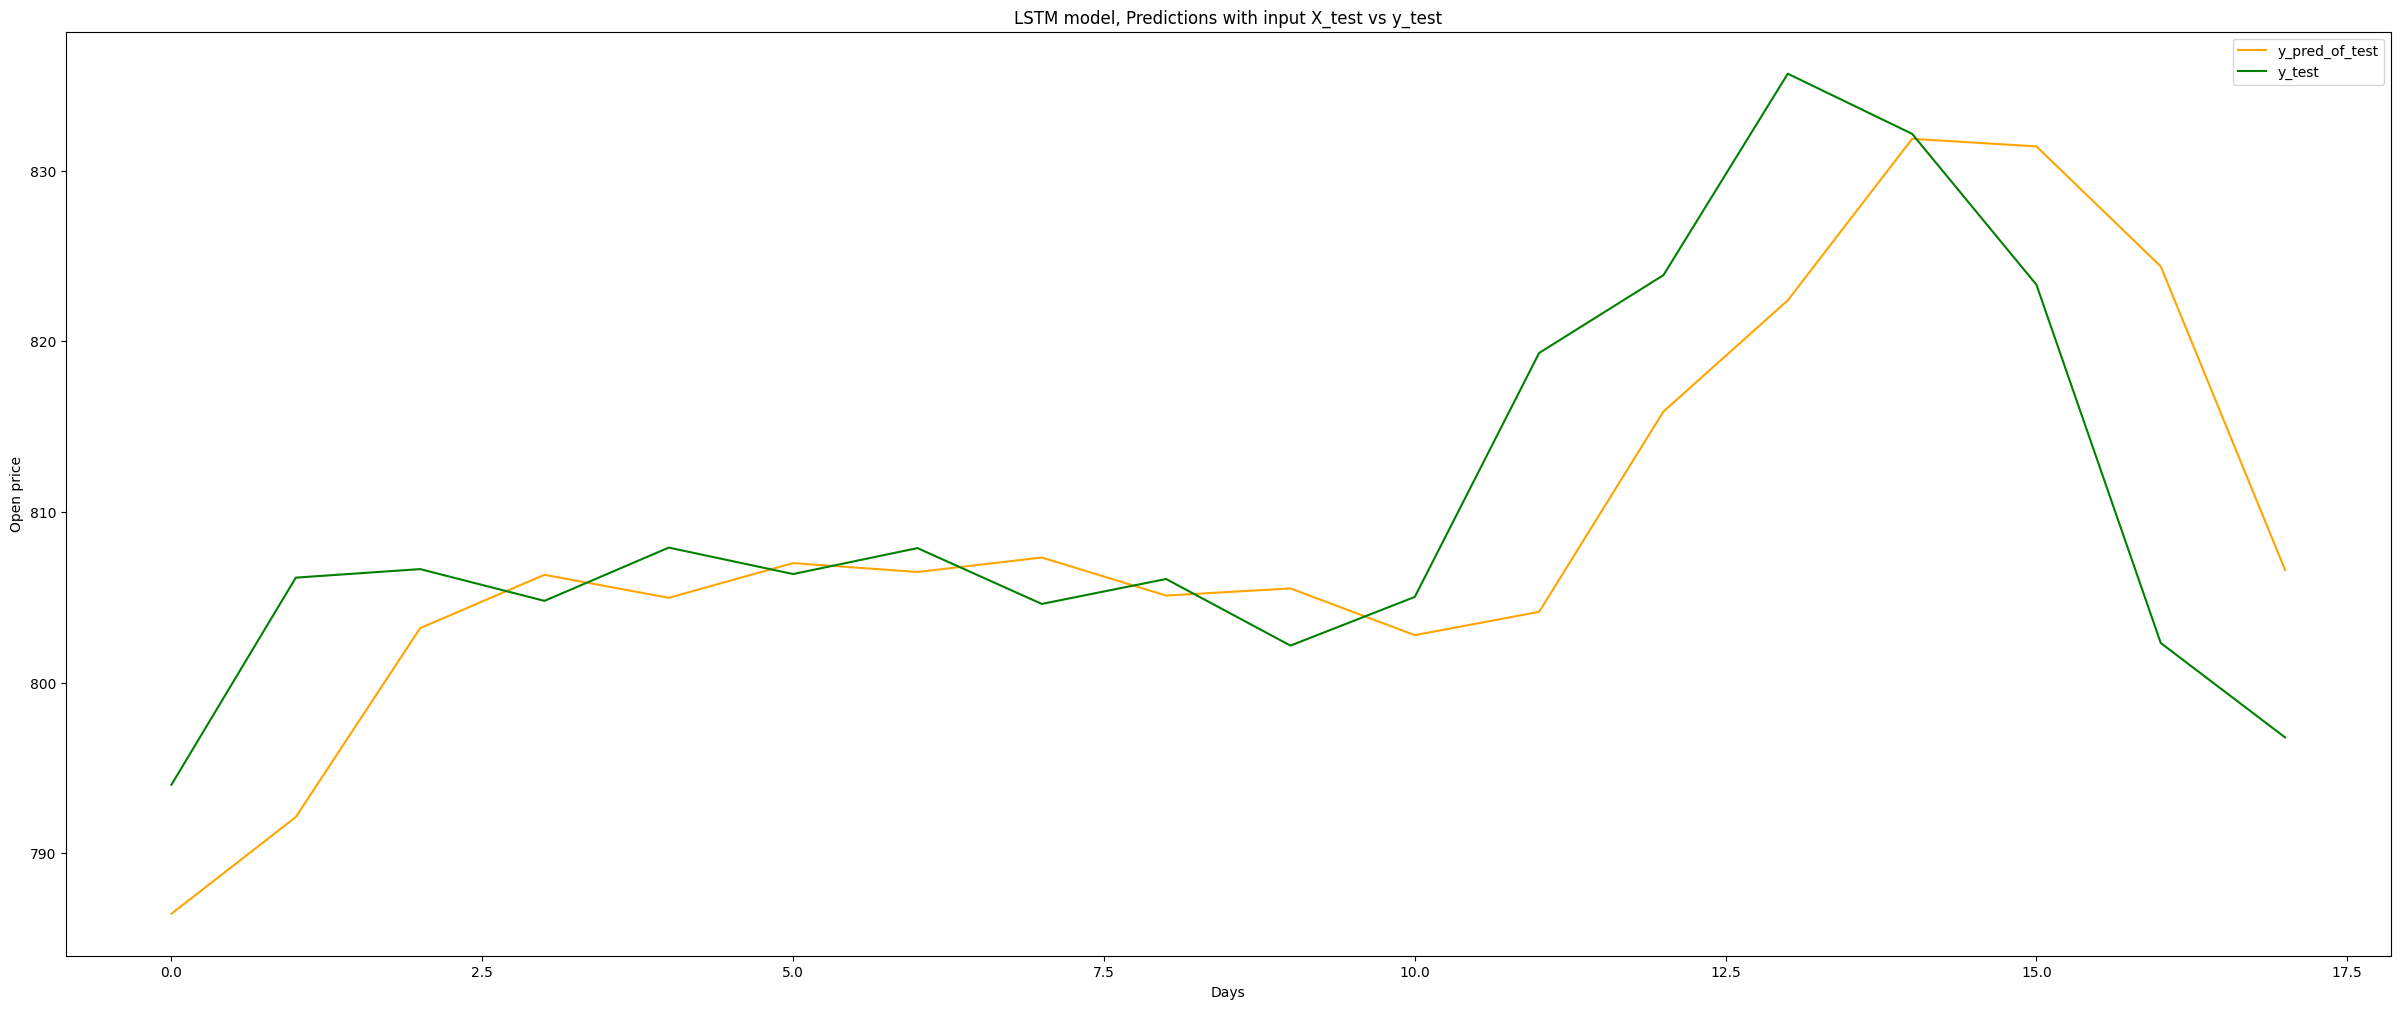

Mean Squared Error (MSE): 79.01339772996273
Mean Absolute Error (MAE): 6.5288540310329815
Root Mean Squared Error (RMSE): 8.88894806655786
Accuracy (within 1.0% tolerance): 72.22%


In [47]:
# with 2 layers 64 and 32 units and change in batch size to 12
model_rnn, history_rnn = train_rnn_model(X_train, y_train, 
                                         rnn_units=[64, 32], 
                                         dropout_rate=0.2, 
                                         epochs=50, 
                                         batch_size=12)
evaluate_predictions(model_rnn, X_train, y_train, scaler, data_type="Test")

evaluate_predictions(model_rnn, X_val, y_val, scaler, data_type="Test")

evaluate_predictions(model_rnn, X_test, y_test, scaler, data_type="Test")
